In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the data as a pandas dataframe from csv
df = pd.read_csv('data.txt', sep=' ', header=None)
#  remove line if 0 is greater than 255
df = df[df[0] <= 255]
df.head()

,0,1
0,0.0,1023.0
1,0.0,1023.0
2,0.0,1023.0
3,0.0,1021.0
4,0.0,1018.0


In [3]:
# convert to floats 
df = df.astype(float)
# add names to columns
df.columns = ['led_value', 'signal']
#  the signal is binary so we can use the thresold to get the binary signal
thresold  =600
df['bin_sig'] = df['signal'] > thresold
df.head()

,led_value,signal,bin_sig
0,0.0,1023.0,True
1,0.0,1023.0,True
2,0.0,1023.0,True
3,0.0,1021.0,True
4,0.0,1018.0,True


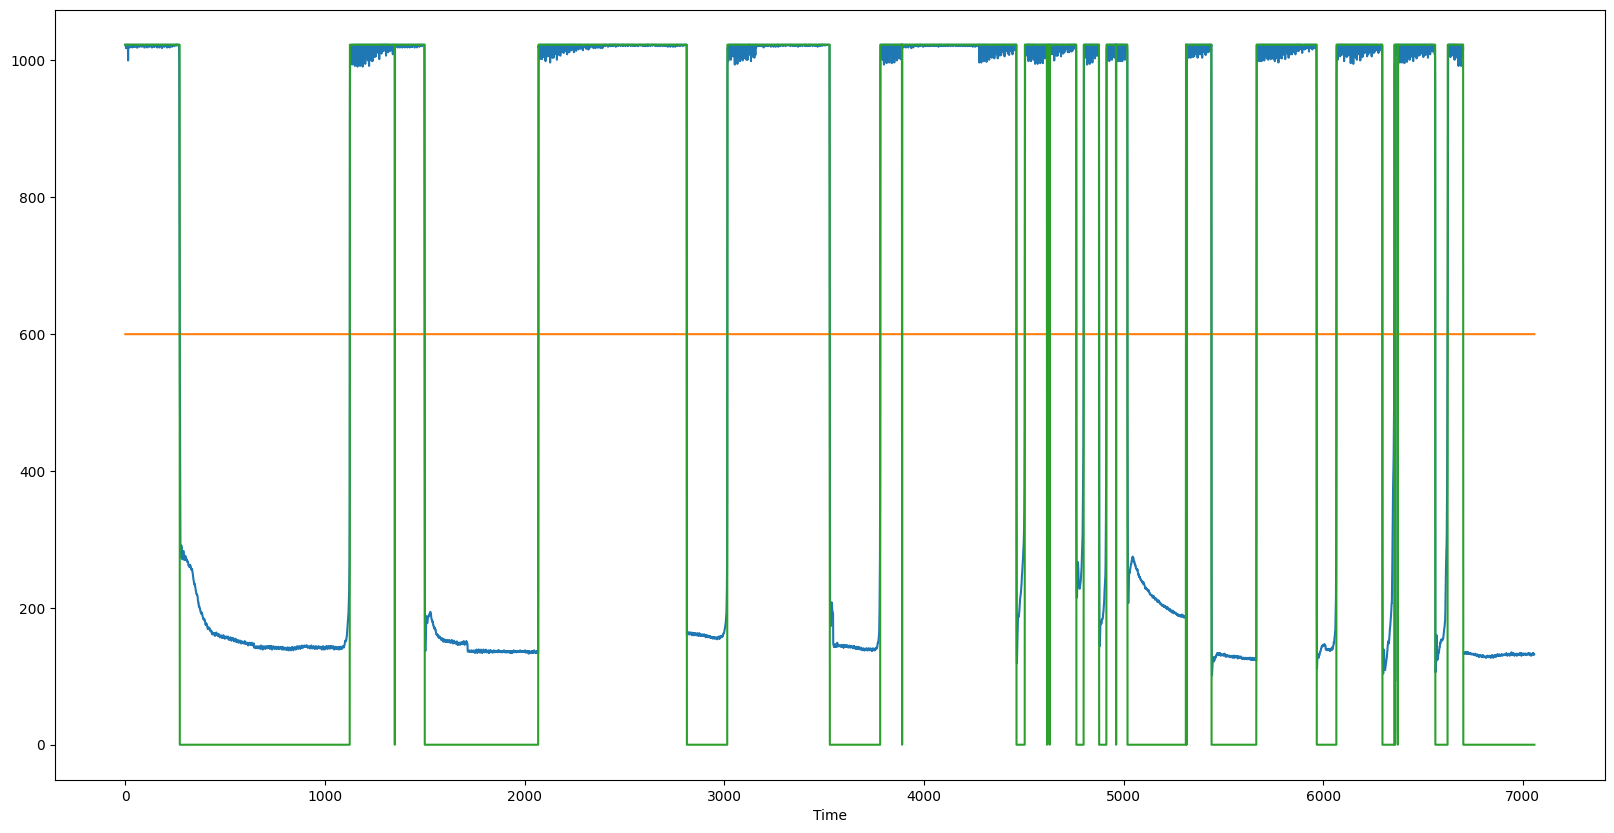

In [7]:
# display the curve
plt.figure(figsize=(20,10))
plt.plot(df.index, df['signal'])

plt.plot(df.index, [thresold]*len(df.index))
plt.plot(df.index, df['bin_sig']*1023)
# plt.plot(df.index, df['led_value']*1023/255)
plt.xlabel('Time')
plt.show()

In [6]:
#  compute signal to noise ratio
signal = df['signal'].mean()
noise = df['signal'].std()
snr = signal/noise
print('signal to noise ratio: ', snr)

signal to noise ratio:  1.504946376535173


In [8]:
#  compute SNR
signal = df['signal'].mean()
noise = df['signal'].std()
snr = (signal/(1.96*noise))**2
print('signal to noise ratio: ', snr)

signal to noise ratio:  0.5895625771153546


In [9]:
# compute SNR of the binary signal
# compute when true
signal = df[df['bin_sig'] == True]['signal'].mean()
noise = df[df['bin_sig'] == True]['signal'].std()
snr = (signal/(1.96*noise))**2
print('ON signal to noise ratio: ', snr)
#  compute when false
signal = df[df['bin_sig'] == False]['signal'].mean()
noise = df[df['bin_sig'] == False]['signal'].std()
snr = (signal/(1.96*noise))**2
print('OFF signal to noise ratio: ', snr)

ON signal to noise ratio:  1203.5918490762688
OFF signal to noise ratio:  2.9916235905987083
